# Assignemnt 5 - Zhengxi Shen

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Columia/APAN 5420/purchase_credit_card.csv')

df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


## Explore the dataframe

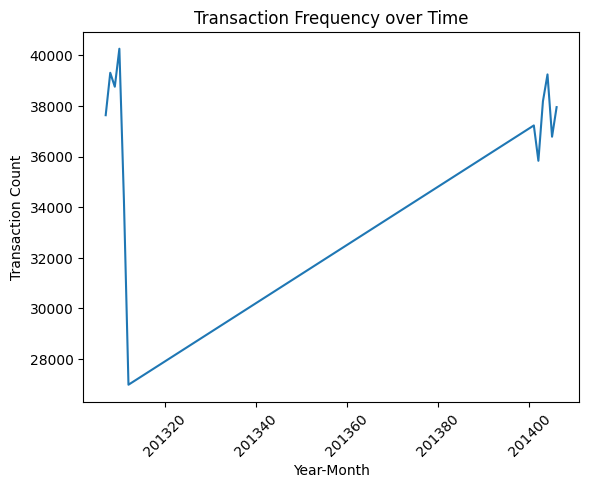

In [7]:
# Group the data by Year-Month and calculate the transaction count
monthly_transaction_count = df.groupby('Year-Month')['Agency Number'].count()

# Plot a line plot of transaction frequency by month
plt.plot(monthly_transaction_count.index, monthly_transaction_count.values)
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Frequency over Time')
plt.xticks(rotation=45)
plt.show()

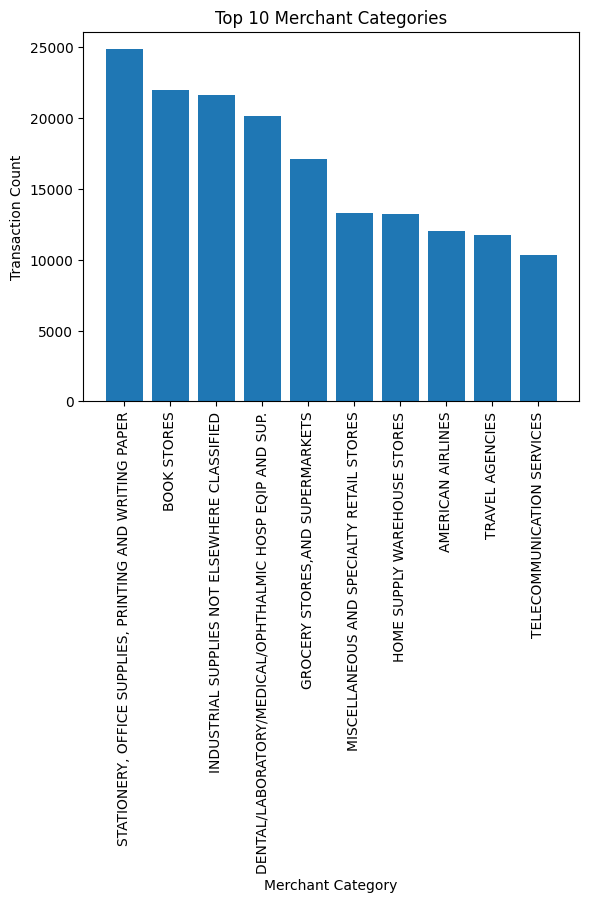

In [8]:
# Get the top 10 most common merchant categories
top_merchant_categories = df['Merchant Category Code (MCC)'].value_counts().head(10)

# Plot a bar plot of the top 10 merchant categories
plt.bar(top_merchant_categories.index, top_merchant_categories.values)
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Count')
plt.title('Top 10 Merchant Categories')
plt.xticks(rotation=90)
plt.show()

In [9]:
df['Vendor'].value_counts()

STAPLES                      14842
AMAZON MKTPLACE PMTS         12197
WW GRAINGER                  12076
Amazon.com                   10766
BILL WARREN OFFICE PRODUC     4479
                             ...  
AMERICAN AI 0017369561070        1
AMERICAN AI 0017369561061        1
AMERICAN AI 0017369561082        1
UNITED      0167369561044        1
GENERATOR AND MOTOR SERVI        1
Name: Vendor, Length: 86729, dtype: int64

In [10]:
(df['Vendor'].value_counts() > 1).value_counts()

False    65049
True     21680
Name: Vendor, dtype: int64

In [11]:
df.columns

Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')

## Begin to create fraud detection features

#### 1. Monthly Average Transaction Frequency of each cardholder

In [12]:
# Convert 'Year-Month' column to datetime format
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y%m')

# Calculate Transaction Frequency per month
transaction_frequency = df.groupby(['Cardholder Last Name', pd.Grouper(key='Year-Month', freq='M')]).size().reset_index()
transaction_frequency.columns = ['Cardholder Last Name', 'Year-Month', 'Transaction_Frequency']

# Calculate Average Monthly Transaction Frequency per cardholder
average_monthly_frequency = transaction_frequency.groupby('Cardholder Last Name')['Transaction_Frequency'].mean().reset_index()
average_monthly_frequency.columns = ['Cardholder Last Name', 'Average_Monthly_Frequency']

# Merge the Average Monthly Frequency into the original dataframe
df_new = pd.merge(df, average_monthly_frequency, on='Cardholder Last Name', how='left')

In [13]:
df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,20.818182
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,20.818182
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,24.250000
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",24.250000
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",5.916667


In [14]:
df_new['Average_Monthly_Frequency'].describe()

count    442458.000000
mean         76.646416
std         152.406036
min           1.000000
25%          11.111111
50%          25.000000
75%          65.083333
max         844.750000
Name: Average_Monthly_Frequency, dtype: float64

In [15]:
df_new['Average_Monthly_Frequency'].nunique()

856

#### About this feature:
##### The 'Average_Monthly_Frequency' feature can help detect fraud transactions by identifying unusual patterns of transaction activity for each cardholder. By calculating the average number of transactions made per month by a cardholder, we establish their normal spending behavior. Any significant deviation from this average can be indicative of fraudulent activity. For instance, abnormally high transaction frequencies may suggest an individual is engaging in excessive or unauthorized transactions. Conversely, unexpectedly low frequencies could indicate account takeover or compromised cards.

#### 2. Deviation of Average Monthly Transaction Frequency of each Cardholder

In [16]:
# Convert 'Year-Month' column to datetime format
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y%m')

# Calculate Transaction Amount Deviation per cardholder per month
transaction_amount_deviation = df.groupby(['Cardholder Last Name', pd.Grouper(key='Year-Month', freq='M')])['Amount'].std().reset_index()
transaction_amount_deviation.columns = ['Cardholder Last Name', 'Year-Month', 'Transaction_Amount_Deviation']

# Calculate Average Transaction Amount Deviation per cardholder
average_transaction_amount_deviation = transaction_amount_deviation.groupby('Cardholder Last Name')['Transaction_Amount_Deviation'].mean().reset_index()
average_transaction_amount_deviation.columns = ['Cardholder Last Name', 'Average_Transaction_Amount_Deviation']

# Merge the Average Transaction Amount Deviation into the original dataframe
df_new = pd.merge(df_new, average_transaction_amount_deviation, on='Cardholder Last Name', how='left')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,20.818182,241.780675
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,20.818182,241.780675
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,24.250000,569.013452
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",24.250000,569.013452
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",5.916667,135.351171


In [17]:
df_new['Average_Transaction_Amount_Deviation'].describe()

count    441988.000000
mean        787.648640
std        2573.516463
min           0.000000
25%         288.109360
50%         452.181985
75%         688.910676
max      242578.482577
Name: Average_Transaction_Amount_Deviation, dtype: float64

In [18]:
df_new['Average_Transaction_Amount_Deviation'].nunique()

3655

#### About this feature:
##### This feature can help in detecting fraud transactions by identifying abnormal patterns in transaction amounts for each cardholder. By calculating the standard deviation of transaction amounts, we capture the degree of variation from the average transaction amount for a particular cardholder. Higher standard deviations indicate a wider range of transaction amounts, which can potentially indicate outliers and suspicious activity. Fraudulent transactions often involve unusual or extreme transaction amounts that deviate significantly from the cardholder's normal spending behavior.

#### 3. Time since Last Transaction

In [19]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df_new['Transaction Date'])

# Sort the dataframe by 'Cardholder Last Name' and 'Transaction Date' in ascending order
df_new.sort_values(['Cardholder Last Name', 'Transaction Date'], inplace=True)

# Calculate the time difference in minutes between the current and previous transaction for each cardholder
df_new['Time since Last Transaction'] = (df_new.groupby('Cardholder Last Name')['Transaction Date'].diff().dt.total_seconds() / 60).fillna(0)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0


In [20]:
df_new['Time since Last Transaction'].describe()

count    442458.000000
mean       3490.718848
std       11694.765684
min           0.000000
25%           0.000000
50%           0.000000
75%        2880.000000
max      528480.000000
Name: Time since Last Transaction, dtype: float64

In [21]:
df_new['Time since Last Transaction'].nunique()

254

#### About this feature:
##### This feature can assist in detecting fraud by identifying transactions that occur too frequently Unusually frequent transactions may be an indicator of fraudulent activity, such as card cloning or automated transactions. By calculating the time difference between consecutive transactions, we can identify cardholders who engage in rapid, suspicious transaction patterns. Large gaps between transactions are considered normal, while very short intervals suggest abnormal and potentially fraudulent behavior.

#### 4. Transaction Rank per Cardholder

In [22]:
import pandas as pd

# Calculate the Transaction Amount Rank within each cardholder's transaction history
df_new['Transaction Amount Rank'] = df_new.groupby('Cardholder Last Name')['Amount'].rank(ascending=True, method='min')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,1.0
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,7.0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,10.0
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,6.0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,9.0


In [23]:
df_new['Transaction Amount Rank'].describe()

count    442458.000000
mean        417.292416
std        1050.897897
min           1.000000
25%          38.000000
50%         118.000000
75%         328.000000
max       10137.000000
Name: Transaction Amount Rank, dtype: float64

In [24]:
df_new['Transaction Amount Rank'].nunique()

7608

#### About this feature:
##### This feature can be valuable in detecting fraud by identifying transactions that rank unusually high within a cardholder's transaction history. Anomalously high-ranked transaction amounts, especially if they consistently appear within the top few ranks, may indicate potential fraudulent behavior. For instance, if a new transaction consistently ranks among the top 3 transaction amounts for a cardholder, it could be an indicator of fraudulent activity such as unauthorized large purchases or identity theft.

#### 5. Transaction Amount Percentile per Cardholder

In [25]:
# Calculate the Transaction Amount Percentile within each cardholder's transaction history
df_new['Transaction Amount Percentile'] = df_new.groupby('Cardholder Last Name')['Amount'].rank(pct=True)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,1.0,1.0
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,7.0,0.7
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,10.0,1.0
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,6.0,0.6
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,9.0,0.9


In [26]:
df_new['Transaction Amount Percentile'].describe()

count    442458.000000
mean          0.504420
std           0.287515
min           0.000099
25%           0.258913
50%           0.501992
75%           0.753690
max           1.000000
Name: Transaction Amount Percentile, dtype: float64

In [27]:
df_new['Transaction Amount Percentile'].nunique()

129131

#### About this feature:
##### This feature aids in detecting fraud transactions by quantifying the relative position of each transaction amount within a cardholder's transaction history. Unusually high or low percentiles indicate transaction amounts that deviate significantly from the norm.

#### 6. Odd-hour transaction

In [28]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Extract the hour component from the 'Transaction Date' column
df_new['Transaction Hour'] = df_new['Transaction Date'].dt.hour

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,1.0,1.0,0
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,7.0,0.7,0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,10.0,1.0,0
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,6.0,0.6,0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,9.0,0.9,0


In [29]:
df_new['Transaction Hour'].describe()

count    442458.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Transaction Hour, dtype: float64

In [30]:
df_new['Transaction Hour'].nunique()

1

#### About this feature:
##### This feature can aid in detecting fraud transactions by identifying transactions that occur during unusual hours, such as late at night or early in the morning. Unusual transaction timing may indicate potentially fraudulent activity, as fraudsters often take advantage of off-peak hours when monitoring and security measures may be less stringent.

#### 7. Frequent transactions to same vendor from same cardholder

In [31]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Sort the dataframe by 'Cardholder Last Name', 'Vendor', and 'Transaction Date' in ascending order
df_new.sort_values(['Cardholder Last Name', 'Vendor', 'Transaction Date'], inplace=True)

# Calculate the time difference in minutes between consecutive transactions for the same cardholder to the same vendor
df_new['Time since Last Transaction (Cardholder-Vendor)'] = df_new.groupby(['Cardholder Last Name', 'Vendor'])['Transaction Date'].diff().dt.total_seconds() / 60

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor)
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,1.0,1.0,0,NaN
297113,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,OTHER FEES,1.666667,492.220566,83520.0,1.0,0.1,0,NaN
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,10.0,1.0,0,NaN
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,9.0,0.9,0,46080.0
95855,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,18720.0,8.0,0.8,0,175680.0


In [32]:
df_new['Time since Last Transaction (Cardholder-Vendor)'].describe()

count    276593.000000
mean      34594.907608
std       62262.946616
min           0.000000
25%           0.000000
50%       10080.000000
75%       41760.000000
max      524160.000000
Name: Time since Last Transaction (Cardholder-Vendor), dtype: float64

In [33]:
df_new['Time since Last Transaction (Cardholder-Vendor)'].nunique()

363

#### About this feature:
##### This feature is valuable in detecting fraud transactions by identifying repetitive transactions within a short time period involving the same cardholder and vendor. Fraudsters often conduct multiple transactions in quick succession to maximize their fraudulent gains. By flagging transactions that recur within a specified time threshold, this feature helps identify potentially suspicious behavior. Frequent repetitive transactions may indicate fraudulent activities such as unauthorized purchases, account takeovers, or the use of stolen cards.

#### 8. Uncommon Merchant Category

In [34]:
# Calculate the count of transactions for each merchant category
merchant_category_count = df_new['Merchant Category Code (MCC)'].value_counts().reset_index()
merchant_category_count.columns = ['Merchant Category Code (MCC)', 'Merchant Category Count']

# Merge the 'Merchant Category Count' to df_new
df_new = pd.merge(df_new, merchant_category_count, on = 'Merchant Category Code (MCC)', how = 'left')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,1.0,1.0,0,NaN,1233
1,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,OTHER FEES,1.666667,492.220566,83520.0,1.0,0.1,0,NaN,1233
2,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,10.0,1.0,0,NaN,1233
3,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,9.0,0.9,0,46080.0,1233
4,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,18720.0,8.0,0.8,0,175680.0,1233


In [35]:
df_new['Merchant Category Count'].describe()

count    442458.000000
mean       9529.492359
std        7716.633849
min           1.000000
25%        2925.000000
50%        7141.000000
75%       13335.000000
max       24860.000000
Name: Merchant Category Count, dtype: float64

In [36]:
df_new['Merchant Category Count'].nunique()

247

#### About this feature:
##### This feature helps detect fraud transactions by flagging transactions made with uncommon or suspicious merchant categories. Fraudsters often exploit lesser-known or unusual merchant categories to carry out fraudulent activities. By identifying transactions associated with uncommon merchant categories, this feature enhances the ability to detect potentially fraudulent transactions and take appropriate preventive measures.

#### 9. Number of transactions in the same day

In [37]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df_new['Transaction Date'])

# Calculate the same-day transactions count for each transaction
df_new['Same-Day Transactions Count'] = df_new.groupby(['Cardholder Last Name', df_new['Transaction Date'].dt.date])['Transaction Date'].transform('count')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,1.0,1.0,0,NaN,1233,1
1,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,OTHER FEES,1.666667,492.220566,83520.0,1.0,0.1,0,NaN,1233,2
2,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,10.0,1.0,0,NaN,1233,1
3,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,9.0,0.9,0,46080.0,1233,1
4,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,18720.0,8.0,0.8,0,175680.0,1233,1


In [38]:
df_new['Same-Day Transactions Count'].describe()

count    442458.000000
mean          6.364175
std          11.293115
min           1.000000
25%           1.000000
50%           3.000000
75%           6.000000
max         165.000000
Name: Same-Day Transactions Count, dtype: float64

In [39]:
df_new['Same-Day Transactions Count'].nunique()

92

#### About this feature:
##### This feature helps detect fraud by capturing the number of transactions made by a cardholder on the same day. Unusually high counts of same-day transactions may indicate suspicious activities, such as attempts to exhaust the credit limit, conduct fraudulent transactions, or engage in money laundering.

### Feature Engineering before creating new fraud detection variables

### Merchant Category

In [40]:
df['Merchant Category Code (MCC)'].value_counts().mean()

1017.1448275862069

In [41]:
(df['Merchant Category Code (MCC)'].value_counts() > df['Merchant Category Code (MCC)'].value_counts().mean()).value_counts()

False    363
True      72
Name: Merchant Category Code (MCC), dtype: int64

In [42]:
(df['Merchant Category Code (MCC)'].value_counts() > df['Merchant Category Code (MCC)'].value_counts().median()).value_counts()

False    219
True     216
Name: Merchant Category Code (MCC), dtype: int64

#### Dimension Reduction
##### There are over 400 merchant category, so it might be a little mess while create features or do fraud detection based on all of them. So I am think of doing feature selecting on these categories to make less dementions, migrate categories with few record to broder groups.

In [43]:
# Convert each category to a single dummy column, prepare for demension reduction
df_merchat_dummy = pd.get_dummies(df['Merchant Category Code (MCC)'],prefix='category')

df_pca = pd.concat([df, df_merchat_dummy], axis = 1)

df_pca.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,category_WELDING SERVICES,category_WESTIN HOTELS,category_WESTJET AIRLINES,category_WHOLESALE CLUBS,category_WIG AND TOUPEE SHOPS,category_WOMEN'S ACCESSORY AND SPECIALTY STORES,category_WOMEN'S READY-TO-WEAR STORES,category_WRECKING AND SALVAGE YARDS,category_WYNDHAM HOTELS,category_WYNN LAS VEGAS
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0


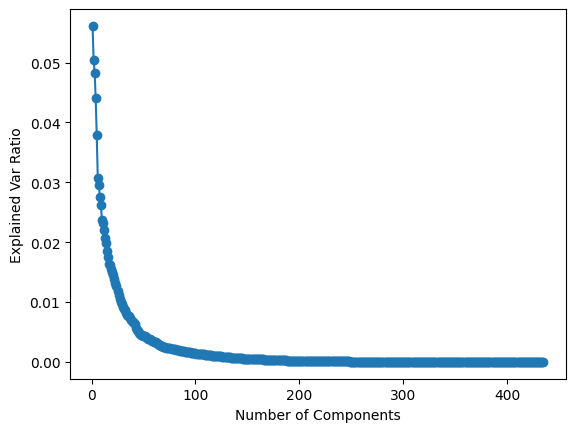

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pick out the category dummy columns for pca and keep the rest columns as original
category_columns = [col for col in df_pca.columns if col.startswith('category_')]
df_category = df_pca[category_columns]

# Use PCA explain variance ratio to pick the best number of components to keep
pca = PCA()
pca.fit(df_category)
explain_var_ratio = pca.explained_variance_ratio_

#Plot the explain ratio
plt.plot(range(1, len(explain_var_ratio) +1), explain_var_ratio, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Var Ratio')
plt.show()

In [45]:
# It's to hard to find the best choice from the plot above, let use another way to pick the number of components
import numpy as np

cumulative_explained_variance_ratio = np.cumsum(explain_var_ratio)
optimal_n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1
optimal_n_components

118

In [46]:
pca = PCA(n_components=optimal_n_components)
pca_result = pca.fit_transform(df_category)

# Create a DataFrame with the PCA results
df_pca_dummy = pd.DataFrame(pca_result, columns=[f"PCA{i+1}" for i in range(optimal_n_components)])

# Replace the category dummy columns with the PCA columns in df1
df_pca.drop(category_columns, axis=1, inplace=True)
df_pca = pd.concat([df_pca, df_pca_dummy], axis=1)

df_pca.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,PCA109,PCA110,PCA111,PCA112,PCA113,PCA114,PCA115,PCA116,PCA117,PCA118
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.001072,0.000247,-0.001380,-0.000073,0.000318,-0.000589,-0.000512,0.000029,-0.000752,-0.000454
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.016242,0.006009,-0.021546,0.000990,0.006297,-0.006696,-0.002408,-0.000769,-0.009842,-0.003790
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000554,0.000128,-0.000717,-0.000036,0.000167,-0.000306,-0.000266,0.000013,-0.000394,-0.000235
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000216,0.000050,-0.000280,-0.000014,0.000066,-0.000119,-0.000104,0.000004,-0.000155,-0.000091
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000147,0.000034,-0.000191,-0.000009,0.000045,-0.000082,-0.000071,0.000003,-0.000106,-0.000062


In [47]:
df_pca['Merchant Category PCA'] = df_pca_dummy.idxmax(axis=1)

# Remove the PCA columns from df1
df_pca.drop(df_pca_dummy.columns, axis=1, inplace=True)

# Display the updated DataFrame
df_pca.head(10)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",PCA16
6,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5
7,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,FAST FOOD RESTAURANTS,PCA29
8,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",PCA75
9,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,TELECOMMUNICATION SERVICES,PCA10


##### In order to make the PCA result more explainable, a table that map each original merchant category (Merchant Category Code (MCC)) to PCA component (Merchant Category PCA).
##### Since there are 435 different unique original merchant categories which are hard to be displayed in a single table or plot here. Thus there are also two search tools that allow audience to search the connection between original categoriesand PCA coponents.

In [48]:
# Remove duplicate categories from the 'Merchant Category Code (MCC)' column
unique_categories = df_pca['Merchant Category Code (MCC)'].drop_duplicates()

# Create a table to display the connection between original categories and PCA components
category_pca_table = pd.DataFrame({
    'Original Category': unique_categories,
    'PCA Component': df_pca.loc[unique_categories.index, 'Merchant Category PCA']
})

category_pca_table.reset_index(drop=True, inplace=True)

# Display the table
print(category_pca_table)

                                     Original Category PCA Component
0          CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS         PCA31
1                                             SHERATON         PCA91
2    DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...         PCA23
3                      GROCERY STORES,AND SUPERMARKETS          PCA5
4    STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...          PCA1
..                                                 ...           ...
430                     SILVER LEGACY HOTEL AND CASINO         PCA43
431                           BALLY'S HOTEL AND CASINO         PCA43
432                                    ROYAL AIR MAROC         PCA43
433                                    JAPAN AIR LINES         PCA43
434     COURT COST INCLUDING ALIMONY AND CHILD SUPPORT         PCA43

[435 rows x 2 columns]


In [49]:
# Search function to find 'Merchant Category PCA' based on 'Merchant Category Code (MCC)'
def search_pca_by_category(category_code):
    result = category_pca_table.loc[category_pca_table['Original Category'] == category_code, 'PCA Component']
    if not result.empty:
        return result.values[0]
    else:
        return 'Category not found'

# Search function to find 'Merchant Category Code (MCC)' based on 'Merchant Category PCA'
def search_category_by_pca(pca_component):
    result = category_pca_table.loc[category_pca_table['PCA Component'] == pca_component, 'Original Category']
    if not result.empty:
        return result.values[0]
    else:
        return 'PCA component not found'

##### Here are the search tools

In [50]:
# Use Merchant Category Code (MCC) to search the PCA componennt
category_code = 'CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS'  # Here is just an example, please enter the PCA component you want to search
pca_component = search_pca_by_category(category_code)
print(f"PCA Component for Category '{category_code}': {pca_component}")

PCA Component for Category 'CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS': PCA31


In [51]:
# Use PCA componennt to search the Merchant Category Code (MCC)
pca_component = 'PCA1'  # Here is just an example, please enter the PCA component you want to search
category_code = search_category_by_pca(pca_component)
print(f"Category for PCA Component '{pca_component}': {category_code}")

Category for PCA Component 'PCA1': STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER


### Create detection feature based on the new PCA Merchant Category components

In [52]:
detect_by_pca_merchant = df_pca.groupby(['Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Merchant Category PCA')
detect_by_pca_merchant

,Average_Amount
Merchant Category PCA,
PCA1,204.915215
PCA10,320.095624
PCA100,177.218907
PCA101,842.595726
PCA102,110.226395
...,...
PCA94,861.002171
PCA95,644.207942
PCA97,151.911008


#### 10. Abnormal Ratio of Amount towards Avergae Amount of each PCA Category

In [53]:
# add the new feature average spending to the dataset
df_pca1 = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Merchant Category PCA'])
# Feature 1: ratio of amount spending and avergae spending by merchant category
df_new['merchant_avg_ratio_amount'] = np.where(df_pca1['Average_Amount']==0,0, df_pca1['Amount'] / df_pca1['Average_Amount'])
df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,1.000000,NaN,0.0,1.0,1.0,0,NaN,1233,1,1.853968
1,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,1.666667,492.220566,83520.0,1.0,0.1,0,NaN,1233,2,0.948063
2,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,1.666667,492.220566,14400.0,10.0,1.0,0,NaN,1233,1,0.245108
3,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,1.666667,492.220566,15840.0,9.0,0.9,0,46080.0,1233,1,1.300424
4,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,1.666667,492.220566,18720.0,8.0,0.8,0,175680.0,1233,1,0.614693


In [54]:
df_new['merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          1.000000
std           4.487598
min        -224.300722
25%           0.130952
50%           0.392162
75%           0.926468
max         932.594037
Name: merchant_avg_ratio_amount, dtype: float64

In [55]:
df_new['merchant_avg_ratio_amount'].nunique()

263118

#### About this feature:
##### This feature is mainly a transformed version of Merchant Category Code, firstly dummy varibaled of merchant categories are created and then merged to a single column(variable) as a new category variable. The reason of doing PCA on original merchant is that there were 435 different merchant category in original data, and more than half of them only occurred very few times, less than the average occurrance number over all categories. This might lead these less-occurs categories as unefficient variables or lease to overfitting of final prediction model. To deal with, it is a good idea to convert these 435 categories to a fewer number of coponents, and PCA is oen of the best choice since this is an unsupervised learning. While choosing the number of components we finally wnat to keep, I calculate with the purpose that these PCA components can repersent at least 95% information of the original categories, and the result of component number is 118.
##### This is the very first step of feature engineering based on merchat component, with the measurement (average transaction amount per time) these abnormal transaction, like 10 times of average amount of that category will be recoganized as potential fraud. But it also has its limitation, merchant category is a very wide category, the prise or the amount buying can be varius case by case. Thus there will have some more complicated features be built based on the idea of PCA merchant category after.  

#### 11. Agency + Merchant Category PCA Components

In [56]:
# Similiar to above amount mean, but add 'Agency Name'

detect_by_pca_merchant = df_pca.groupby(['Agency Name', 'Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Agency Name')
detect_by_pca_merchant

Average_Amount
Agency Name                     Merchant Category PCA                
ARDMORE HIGHER EDUCATION CENTER PCA106                     113.492000
                                PCA93                      153.450000
                                PCA7                       110.559231
                                PCA6                        11.640000
                                PCA52                      750.170000
...                                                               ...
`DEPARTMENT OF EDUCATION        PCA34                      417.158333
                                PCA35                      317.408571
                                PCA36                      615.901667
                                PCA38                      544.733333
                                PCA95                      646.219000

[6032 rows x 1 columns]

###### * Please note that not all PCA components will be included in every Agency

In [57]:
# add the new feature average spending to the dataset
df_pca_agency = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Agency Name', 'Merchant Category PCA'])
df_pca_agency
# Feature 1: ratio of amount spending and avergae spending by merchant category
df_new['agency_merchant_avg_ratio_amount'] = np.where(df_pca_agency['Average_Amount']==0,0, df_pca_agency['Amount'] / df_pca_agency['Average_Amount'])
df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,NaN,0.0,1.0,1.0,0,NaN,1233,1,1.853968,2.081219
1,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,492.220566,83520.0,1.0,0.1,0,NaN,1233,2,0.948063,0.974461
2,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,492.220566,14400.0,10.0,1.0,0,NaN,1233,1,0.245108,0.422515
3,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,492.220566,15840.0,9.0,0.9,0,46080.0,1233,1,1.300424,1.611007
4,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,492.220566,18720.0,8.0,0.8,0,175680.0,1233,1,0.614693,0.464432


In [58]:
df_new['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999858
std           7.239578
min       -2735.680000
25%           0.172551
50%           0.499314
75%           1.093288
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

In [59]:
df_new['agency_merchant_avg_ratio_amount'].nunique()

323690

#### About this feature:
##### This feature is a combination of PCA merchant category and agency. Addition to the trend of each PCA category, this feature can also capture and repersent the transaction trend of each agency. For example, there might be a few agency that always spend a lot of money on every merchant category, and this can be 10 times more than the average of this category overall. Under this situation, with simple PCA categoty feature, the transactions will be detected as potential frauds, unless we consider the agency trends as this new feature. And it will still capture abnormal transactions if an agency spends much more than it used to on same categories.

#### 12. Customer(Full Name) + Merchant Category PCA Components

##### It might be better to add a full name column to avoid any conflict by the seprated First and last name
##### * Please notice that there is still risk of same First initila and Last name repersent different cardholders.

In [60]:
# Combine first and last name

df_pca['Cardholder_Full_Name'] = df_pca['Cardholder First Initial'] + ' ' + df_pca['Cardholder Last Name']

df_pca.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA,Cardholder_Full_Name
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31,C Mason
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91,C Mason
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23,J Massey
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5,T Massey
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1,M Mauro-Herrera


In [61]:
# Similiar to above amount mean, but change to 'Cardholder Name'

detect_by_pca_merchant = df_pca.groupby(['Cardholder_Full_Name', 'Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Cardholder_Full_Name')
detect_by_pca_merchant

Average_Amount
Cardholder_Full_Name Merchant Category PCA                
1 15000              PCA65                     4626.460000
2 24100              PCA65                      278.409000
4 42000              PCA65                      133.998125
4 44600              PCA65                      111.990000
4 48000              PCA65                       96.774615
...                                                    ...
s russell            PCA25                      568.000000
                     PCA115                     166.000000
                     PCA9                        25.000000
                     PCA40                       77.000000
                     PCA95                       49.020000

[64838 rows x 1 columns]

In [62]:
# Add the new feature average spending to the dataset
df_pca_cardholder = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Cardholder_Full_Name', 'Merchant Category PCA'])
df_pca_cardholder
# Feature 1: ratio of amount spending and avergae spending by merchant category
df_new['cardholder_merchant_avg_ratio_amount'] = np.where(df_pca_cardholder['Average_Amount']==0,0, df_pca_cardholder['Amount'] / df_pca_cardholder['Average_Amount'])
df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount,cardholder_merchant_avg_ratio_amount
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,0.0,1.0,1.0,0,NaN,1233,1,1.853968,2.081219,1.000000
1,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,83520.0,1.0,0.1,0,NaN,1233,2,0.948063,0.974461,1.435311
2,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,14400.0,10.0,1.0,0,NaN,1233,1,0.245108,0.422515,0.221141
3,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,15840.0,9.0,0.9,0,46080.0,1233,1,1.300424,1.611007,1.898048
4,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,18720.0,8.0,0.8,0,175680.0,1233,1,0.614693,0.464432,1.938502


In [63]:
df_new['cardholder_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.920160e-01
std      4.239764e+15
min     -7.901622e+17
25%      3.407259e-01
50%      8.189447e-01
75%      1.206256e+00
max      7.901622e+17
Name: cardholder_merchant_avg_ratio_amount, dtype: float64

In [64]:
df_new['cardholder_merchant_avg_ratio_amount'].nunique()

329851

#### About this feature:
##### This feature is quite similiar to the above agency merchant category feature, but switch the focus from each agency to each cardholder (combination of first initial and last name). Same as agency, individual person has his/her own consumption habit. A person may always spend more on certain categories or all categories, this feature will capture this trends and lower the false positive rate. But it will still detect sudden change on transaction amount.

#### 13. Time Series + Merchant Category

In [65]:
# Convert the 'Year_month' column to datetime type for timeseries analysis

df_pca['Year-Month'] = pd.to_datetime(df_pca['Year-Month'], format = '%Y%m').dt.to_period('M')

df_pca.head(10)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA,Cardholder_Full_Name
0,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31,C Mason
1,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91,C Mason
2,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23,J Massey
3,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5,T Massey
4,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1,M Mauro-Herrera
5,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",PCA16,M Mauro-Herrera
6,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5,B Mays
7,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,FAST FOOD RESTAURANTS,PCA29,B Mays
8,2013-07,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",PCA75,D McCarthy
9,2013-07,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,TELECOMMUNICATION SERVICES,PCA10,L McClurg


In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_pca['Year-Month'] = df_pca['Year-Month'].dt.to_timestamp()

# Perform seasonal decomposition for each unique PCA component and year-month combination
trend_components = []
seasonal_components = []

unique_pca_components = df_pca['Merchant Category PCA'].unique()

for pca_component in unique_pca_components:
    component_data = df_pca[df_pca['Merchant Category PCA'] == pca_component]['Year-Month']
    decomposition = seasonal_decompose(component_data, model='additive', period=12)

    seasonal_component = decomposition.seasonal

    seasonal_components.append(seasonal_component)

# Combine the trend and seasonal components into a single feature
new_feature = pd.concat([pd.concat(seasonal_components)], axis=1)
new_feature.columns = ['Seasonal']

# Append the new feature back to the original DataFrame
df_MerchantCategory_Timeseries = pd.concat([df_pca, new_feature], axis=1)

df_MerchantCategory_Timeseries.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA,Cardholder_Full_Name,Seasonal
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31,C Mason,4.699920e+13
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91,C Mason,-4.548303e+13
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23,J Massey,8.115514e+13
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5,T Massey,-4.599019e+13
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1,M Mauro-Herrera,2.800151e+13


In [67]:
df_MerchantCategory_Timeseries = df_MerchantCategory_Timeseries.sort_values(by = 'Cardholder First Initial')
df_MerchantCategory_Timeseries.head()

df_new = df_new.sort_values(by = 'Cardholder First Initial')

df_new['Trasaction Seasonal'] = df_MerchantCategory_Timeseries['Seasonal']
df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount,cardholder_merchant_avg_ratio_amount,Trasaction Seasonal
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,1.0,1.0,0,NaN,1233,1,1.853968,2.081219,1.000000,4.699920e+13
10,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,0.01,PURCHASE FINANCE CHARGE,2014-03-14,03/14/2014 12:00:00 AM,...,2.0,0.2,0,83520.0,1233,2,0.372785,0.588445,0.628720,1.621625e+14
9,2014-01-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,0.77,PURCHASE FINANCE CHARGE,2014-01-15,01/15/2014 12:00:00 AM,...,4.0,0.4,0,47520.0,1233,1,0.093691,0.347749,1.000000,6.742962e+13
7,2013-09-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,6.54,PURCHASE FINANCE CHARGE,2013-09-13,09/13/2013 12:00:00 AM,...,5.0,0.5,0,41760.0,1233,1,0.071308,0.068881,0.100408,-9.413998e+13
6,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,...,6.0,0.6,0,44640.0,1233,1,0.268072,0.332096,0.969789,-4.761876e+13


In [68]:
df_new['Trasaction Seasonal'].describe()

count    4.424580e+05
mean    -7.401663e+09
std      1.058239e+14
min     -8.505855e+14
25%     -3.012025e+13
50%     -2.376030e+12
75%      3.111846e+13
max      7.197593e+14
Name: Trasaction Seasonal, dtype: float64

In [69]:
df_new['Trasaction Seasonal'].nunique()

1392

#### About this feature:
##### This feature can potentially help in detecting fraud by capturing the recurring patterns or anomalies that occur within specific months of the year for each category as below:

##### Identify unusual patterns:
#####   The seasonal component captures the repetitive patterns or seasonality within the past transaction. It provides information about regular fluctuations that occur within specific months of the year. Unusual or unexpected deviations from these regular patterns may indicate potential fraud.

##### Identify abnormal behavior:
#####   The seasonal component can highlight abnormal behavior that deviates significantly from the expected seasonal pattern. If certain months exhibit unusual spikes or dips in activity compared to the normal seasonal behavior, it may indicate fraudulent activity.

#### 14. PCA Merchant Category + Vendor

In [70]:
# Similiar to above amount mean, but change to 'Vendor'

detect_by_pca_merchant = df_pca.groupby(['Vendor', 'Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Vendor')
detect_by_pca_merchant

,,Average_Amount
Vendor,Merchant Category PCA,
#1 PARTY SUPPLIES,PCA6,347.060000
#101 BLUE CORN,PCA28,379.210000
#15 VS,PCA2,58.435000
#17 VS,PCA2,128.900000
#18 VS,PCA2,137.872000
...,...,...
www.molport.com,PCA26,205.000000
www.sublimevideo.net,PCA50,18.188333
www.testking.com,PCA12,99.990000


In [71]:
# Add the new feature average spending to the dataset
df_pca_vendor = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Vendor', 'Merchant Category PCA'])
df_pca_vendor
# Feature 1: ratio of amount spending and avergae spending by merchant category + Vendor
df_new['vendor_merchant_avg_ratio_amount'] = np.where(df_pca_vendor['Average_Amount']==0,0, df_pca_vendor['Amount'] / df_pca_vendor['Average_Amount'])
df_new.head()


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount,cardholder_merchant_avg_ratio_amount,Trasaction Seasonal,vendor_merchant_avg_ratio_amount
0,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,1.0,0,NaN,1233,1,1.853968,2.081219,1.000000,4.699920e+13,1.243789
10,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,0.01,PURCHASE FINANCE CHARGE,2014-03-14,03/14/2014 12:00:00 AM,...,0.2,0,83520.0,1233,2,0.372785,0.588445,0.628720,1.621625e+14,1.721030
9,2014-01-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,0.77,PURCHASE FINANCE CHARGE,2014-01-15,01/15/2014 12:00:00 AM,...,0.4,0,47520.0,1233,1,0.093691,0.347749,1.000000,6.742962e+13,1.012639
7,2013-09-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,6.54,PURCHASE FINANCE CHARGE,2013-09-13,09/13/2013 12:00:00 AM,...,0.5,0,41760.0,1233,1,0.071308,0.068881,0.100408,-9.413998e+13,1.544573
6,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,...,0.6,0,44640.0,1233,1,0.268072,0.332096,0.969789,-4.761876e+13,0.869435


In [72]:
df_new['vendor_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.940951e-01
std      9.397680e+13
min     -1.804536e+16
25%      2.768516e-01
50%      7.933762e-01
75%      1.025641e+00
max      5.413608e+16
Name: vendor_merchant_avg_ratio_amount, dtype: float64

In [73]:
df_new['vendor_merchant_avg_ratio_amount'].nunique()

279293

#### About this Feature:
##### You may notice that vendors are like more segmented categories, there could be several vendors under same merchant category and more under same merchant category PCA component. Thus this feature is created to capture the transaction trends of each vendor among each PCA component, to provided more accurate and sensitive detection to frauds. Since the price of services or products provided by each vendor shall be relatively close, and a sudden huge amount of transaction of a vendor might be potential fraud.

In [78]:
df_model.columns.to_list()

['Amount',
 'Average_Monthly_Frequency',
 'Average_Transaction_Amount_Deviation',
 'Time since Last Transaction',
 'Transaction Amount Rank',
 'Transaction Amount Percentile',
 'Transaction Hour',
 'Time since Last Transaction (Cardholder-Vendor)',
 'Merchant Category Count',
 'Same-Day Transactions Count',
 'merchant_avg_ratio_amount',
 'agency_merchant_avg_ratio_amount',
 'cardholder_merchant_avg_ratio_amount',
 'Trasaction Seasonal',
 'vendor_merchant_avg_ratio_amount']

## Modeling Dataframe

In [74]:
#　Create a new dataframe that only contains the new features created above as independent variables
# Since I will split Train-test data fro further use, so I keep 'Amount' o be used as y
df_model = df_new.iloc[:, [6] + list(range(-14, 0))]
df_model.head()

,Amount,Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount,cardholder_merchant_avg_ratio_amount,Trasaction Seasonal,vendor_merchant_avg_ratio_amount
0,4626.46,1.000000,NaN,0.0,1.0,1.0,0,NaN,1233,1,1.853968,2.081219,1.000000,4.699920e+13,1.243789
10,0.01,1.666667,492.220566,0.0,2.0,0.2,0,83520.0,1233,2,0.372785,0.588445,0.628720,1.621625e+14,1.721030
9,0.77,1.666667,492.220566,28800.0,4.0,0.4,0,47520.0,1233,1,0.093691,0.347749,1.000000,6.742962e+13,1.012639
7,6.54,1.666667,492.220566,25920.0,5.0,0.5,0,41760.0,1233,1,0.071308,0.068881,0.100408,-9.413998e+13,1.544573
6,14.53,1.666667,492.220566,30240.0,6.0,0.6,0,44640.0,1233,1,0.268072,0.332096,0.969789,-4.761876e+13,0.869435


# New Feature Generation Done
Since both ECOD and HBOS are designed for numerical features, so I conly keep the new numerical features or try to transform them to numerical. However, one of the features I created in Assignment 2 can only be shown ans used as categorial, we will only use 14 new features in this assignment.

# HBOS

### What is HBOS
Histogram-based Outlier Score (HBOS) is a technology can be used to detect anomalies in data analytics. HBOS draws histograms for each variables(features) in a dataset, and detect the outliers(potential anomalies) through histograms distributions(value falls in the tails of histograms are outliers). Based on the location of each value on it own histogram, HBOS will assign a anomaly score to it and values with extreme(can be high or low) average score across all of its variables are going to be detected as anomalies.

In [ ]:
from sklearn.model_selection import train_test_split

# Fill all NaN values
df_model = df_model.fillna(0)
X = df_model.drop('Amount',axis = 1)
y = df_model['Amount']

# Split Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## HyperParamter
### Number of Bins
Since HBOS is sensitive to the bin width, I will first use some common methods to estimate the number of bins as hayperparameter to see if can make the model performance well.

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185331 sha256=670bbd73370d79e3694db03d951c199a0b94bd0f18fd22948bfff40e26ac2738
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [ ]:
from pyod.models.hbos import HBOS

# Try a
n_bins = [20, 40, 60, 80, 100]
No_bin = 20
for n_bin in n_bins:
  hbos = HBOS(n_bins = n_bin)

  hbos.fit(X_train)

  # Training data
  y_train_scores = hbos.decision_function(X_train)
  y_train_pred = hbos.predict(X_train)

  # Test data
  y_test_scores = hbos.decision_function(X_test)
  y_test_pred = hbos.predict(X_test)

  print('n_bin:', No_bin)
  # Threshold for the defined comtanimation rate
  print("The threshold for the defined comtanimation rate:" , hbos.threshold_)

  def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

  print("The training data:", count_stat(y_train_pred))
  print("The testing data:", count_stat(y_test_pred))

  No_bin += 20

n_bin: 20
The threshold for the defined comtanimation rate: 42.535632165634595
The training data: {0: 318569, 1: 35397}
The testing data: {0: 79615, 1: 8877}
n_bin: 40
The threshold for the defined comtanimation rate: 42.27253018112191
The training data: {0: 318569, 1: 35397}
The testing data: {0: 79602, 1: 8890}
n_bin: 60
The threshold for the defined comtanimation rate: 42.06217713515731
The training data: {0: 318569, 1: 35397}
The testing data: {0: 79642, 1: 8850}
n_bin: 80
The threshold for the defined comtanimation rate: 41.94560177585599
The training data: {0: 318569, 1: 35397}
The testing data: {0: 79680, 1: 8812}
n_bin: 100
The threshold for the defined comtanimation rate: 41.656840966144614
The training data: {0: 318569, 1: 35397}
The testing data: {0: 79639, 1: 8853}


In [ ]:
# Default number of anomalies in HBOS is 10%
default_anamaly = len(y_test) * 0.1
default_anamaly

8849.2

#### Number of bin used in 60
Since the default number of anomalies of HBOS is 10%, so we estimate the number of anomalies in test data is abround 8849. With n_bin = 60, the anomalies detected in test data is 8846, which is most close to 8849 among all the number of bins we tested. So we shall use 60 bins here.

In [ ]:
hbos = HBOS(n_bins = 60)

hbos.fit(X_train)

# Training data
y_train_scores = hbos.decision_function(X_train)
y_train_pred = hbos.predict(X_train)

# Test data
y_test_scores = hbos.decision_function(X_test)
y_test_pred = hbos.predict(X_test)

## Step 2 — Determine a reasonable threshold

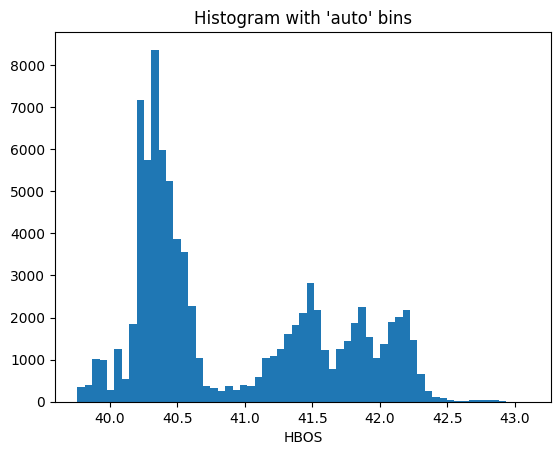

In [ ]:
plt.hist(y_test_scores, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

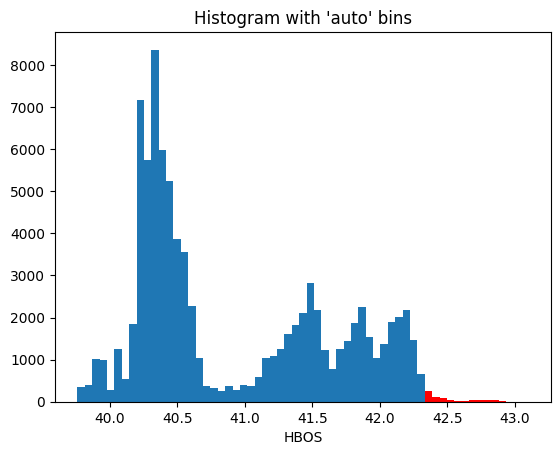

In [ ]:
n, bins, patches = plt.hist(y_test_scores, bins='auto')
condition = 42.3
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

In [ ]:
threshold = 42.3

def descriptive_stat_threshold(df,pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Transaction Amount Percentile,Transaction Hour,Time since Last Transaction (Cardholder-Vendor),Merchant Category Count,Same-Day Transactions Count,merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount,cardholder_merchant_avg_ratio_amount,Trasaction Seasonal,vendor_merchant_avg_ratio_amount,Anomaly_Score
0,Normal,353827,99.960731,76.55,784.76,3466.89,417.26,0.50,0.0,21700.18,9536.38,6.35,0.99,1.00,-2.174510e+12,1.267817e+10,0.99,20.22
1,Outlier,139,0.039269,106.45,331.79,87021.58,1026.14,0.58,0.0,66167.48,8337.10,10.60,32.70,-9.05,5.368720e+15,1.319966e+13,1.54,44.64


### Varibales Exploration
####Average_Monthly_Frequency:  
Normal transactions are with lower average monthly transaction frequency, whil anomaly transactions has higher average transaction rates.   
Business Insight: This is aline with the common sense that frauds are often happen to be frequent transactions in a short period to gain maximum 'profits'.

####Average_Transaction_Amount_Deviation:  
Normal transaction has retavely various amount deviation since card holders may use the same card to buy groceries and electronic products, so the amount of transactions may vary a lot. But fraud transactions will only try to charge as much amount as they can.   
Business Insight: So that several revately fixed amount of large transaction happen closely may be very like to be frauds.

####Time since Last Transaction:  
Normal transactions have relatively reasonable transaction interval time as around roughly 3467 minutes(about 2 days). But these anomaly transactions have abnormally loger time gap between recent transactions, which is roughly 87022 minutes(about 60 days) that make the lastest transaction to be suspecious.  
Business Insight: In general a card that has not been used for a long time is suddenly used to make a purchase, and it is likely that it has been stolen.

#### Transaction amount rank:  
Higher rank means the transaction amount is higher among this cardholder's all transactions. Normal transactions are relatively ranked lower while anomalies are relatively ranked higher.  
Busienss insight: Similiar to the first feature, fraud transactions usually have higher amount, since they want to gain as much as they can before you frozen the card.

#### Transaction amount percentile:  
Higher percentile means the transaction amount is higher among this cardholder's all transactions. Normal transactions have relatively lower percentile while anomalies have relatively higher percentile.  
Busienss insight: Similiar to the above feature, fraud transactions usually have higher amount, since they want to gain as much as they can before you frozen the card.

#### Time since Last Transaction (Cardholder-Vendor):  
Normal transactions have relatively reasonable transaction interval time as around roughly 21700 minutes(about 15 days). But these anomaly transactions have abnormally loger time gap between recent transactions, which is roughly 66167 minutes(about 46 days) that make the lastest transaction to be suspecious.  
Business Insight: In general a card that has not been used for a long time is suddenly used to make a purchase, and it is likely that it has been stolen.

#### Same-day Transactions Count:  
Normal transactions have lower same day transaction amount. One the other hand, fraud transactions usually try to make as many as transactions in a short period of time(usually shorter than a day).   
Busienss insight: So the cards make extremely many transactions a day, or in shorter time period can be frauded.

#### merchant_avg_ratio_amount &  
####agency_merchant_avg_ratio_amount	&  
####cardholder_merchant_avg_ratio_amount &  
####vendor_merchant_avg_ratio_amount:  
These four feature are all the ratio of each transaction amount among sepcific merchant category\agency - merchant category combnination\cardholder - merchant category combination. Normal tansactions are all have relatively lower ratio which shows their amount are not extreme among the groups. However, fraud trasacntion all have relatively much higher ratio.  
Bsuiness insight: Fraud transactions all have relatively higher amount ratio of a fixed category.

### * The other varibales are cutted too sepcific so only contain very few values. Thus had been removed from the list.

# ECOD

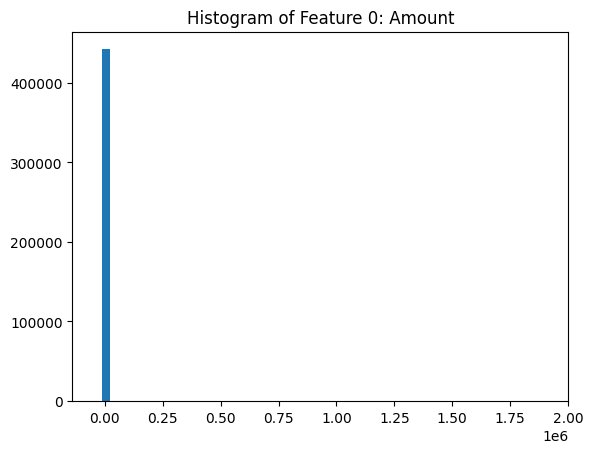

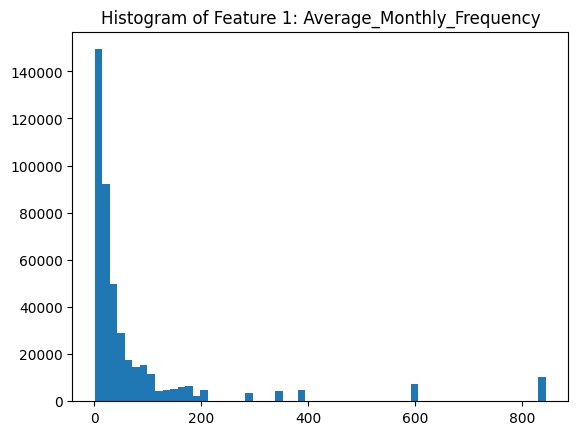

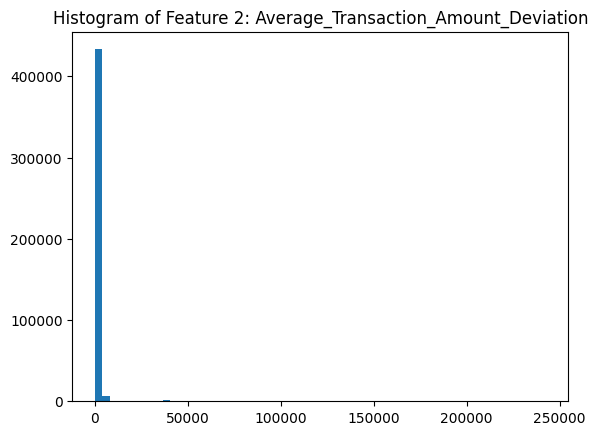

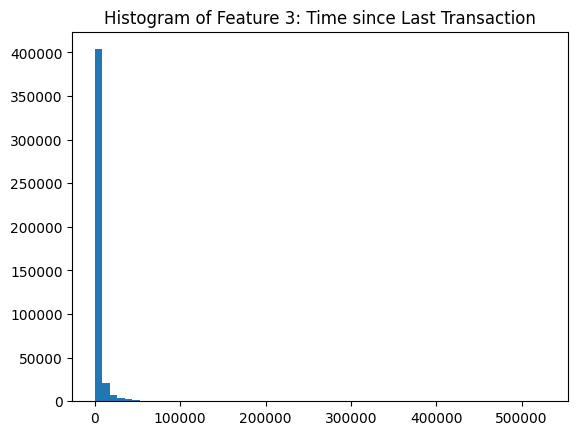

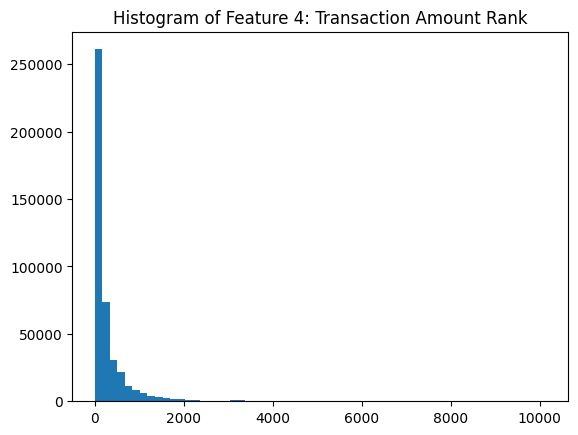

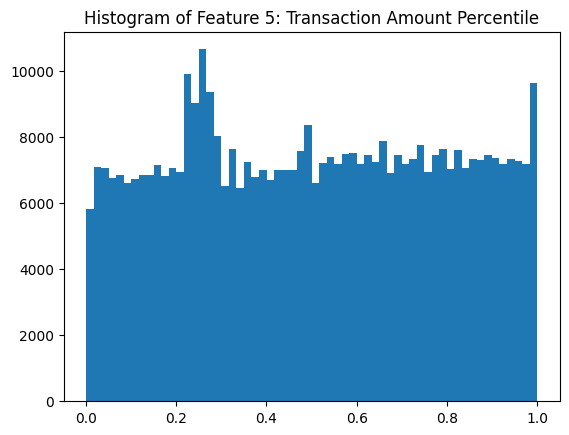

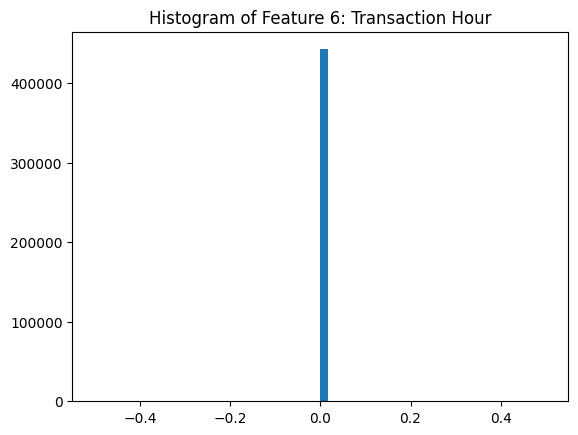

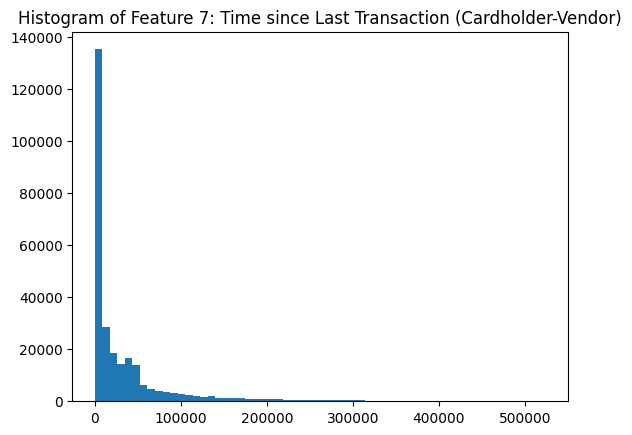

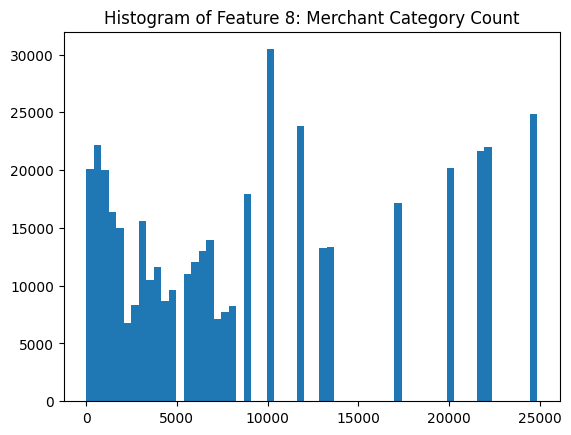

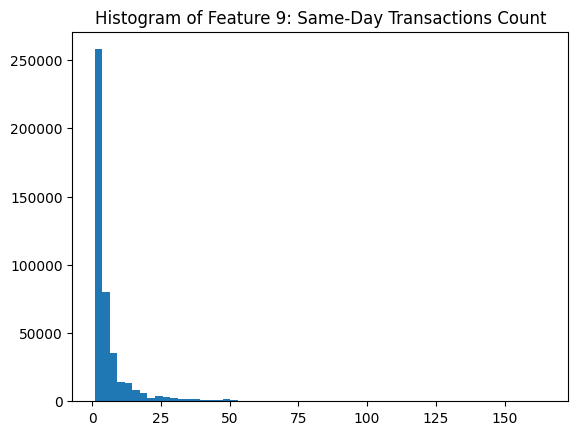

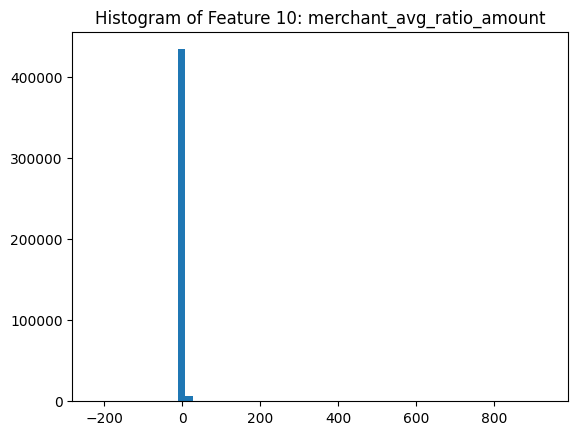

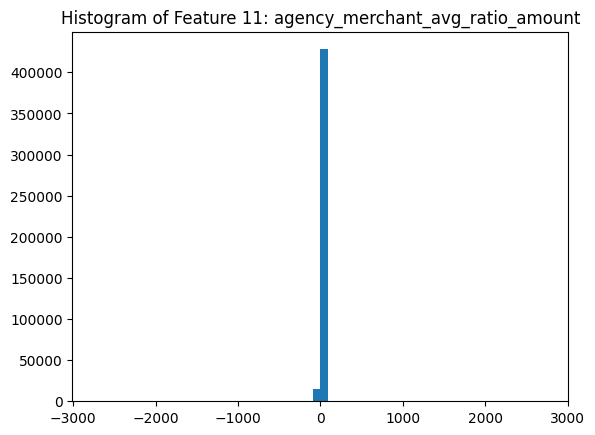

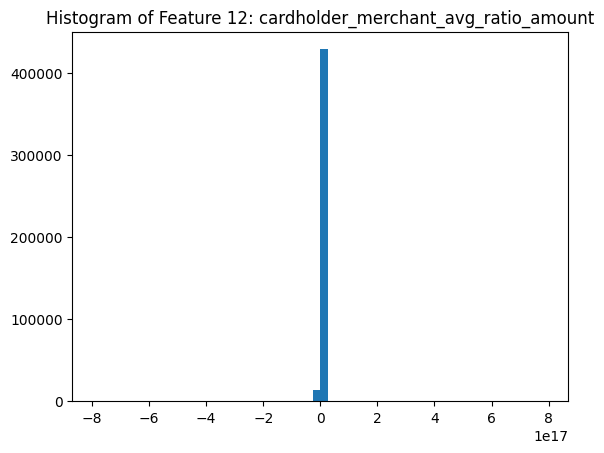

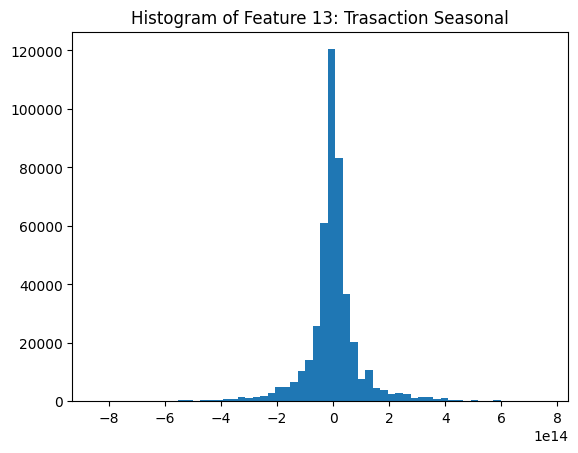

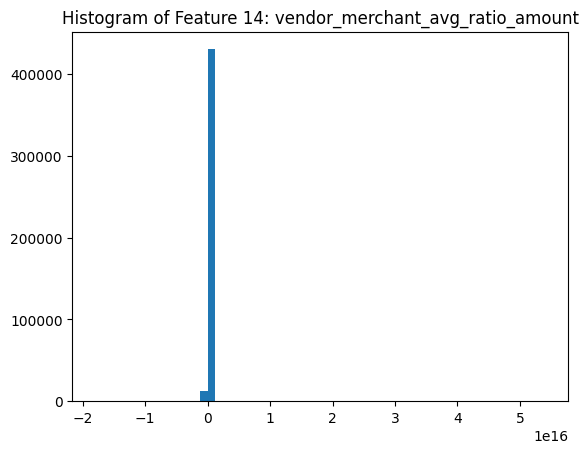

In [ ]:
df_model = df_new.iloc[:, [6] + list(range(-14, 0))]
features = df_model.columns.tolist()
for index, feature in enumerate(features):
  plt.hist(df_model[feature], bins=60)
  plt.title(f"Histogram of Feature {index}: {feature}")
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#　Create a new dataframe that only contains the new features created above as independent variables
df_model = df_new.iloc[:, [6] + list(range(-14, 0))]
df_model = df_model.iloc[:, [0,1,2,3,4,9]]
# Fill all NaN values
df_model = df_model.fillna(0)
X = df_model.drop('Amount',axis = 1)
y = df_model['Amount']

# Split Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

[0,1,4,7,9]]

In [ ]:
from pyod.models.ecod import ECOD

ecod = ECOD(contamination=0.05)
ecod.fit(X_train)

# Training data
y_train_scores = ecod.decision_function(X_train)
y_train_pred = ecod.predict(X_train)

# Test data
y_test_scores = ecod.decision_function(X_test)
y_test_pred = ecod.predict(X_test)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , ecod.threshold_)

print("The training data:", count_stat(y_train_pred))
print("The testing data:", count_stat(y_test_pred))


The threshold for the defined comtanimation rate: 12.56111116510997
The training data: {0: 336267, 1: 17699}
The testing data: {0: 84034, 1: 4458}


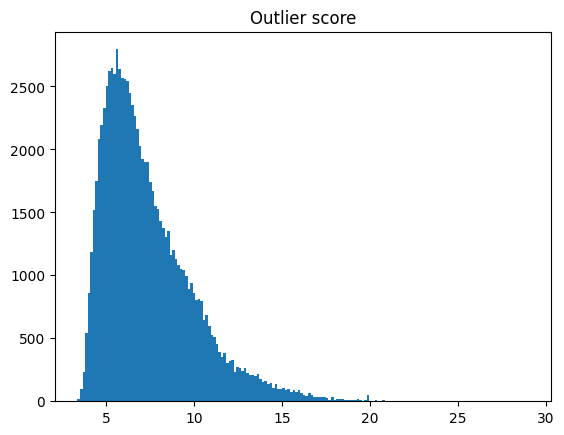

In [ ]:
plt.hist(y_test_scores, bins='auto')
plt.title("Outlier score")
plt.show()

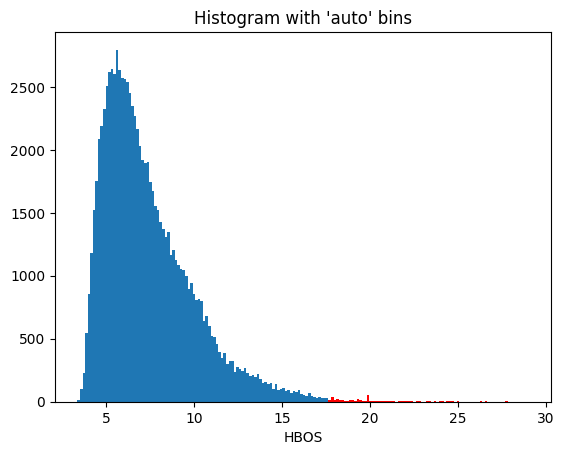

In [ ]:
n, bins, patches = plt.hist(y_test_scores, bins='auto')
condition = 17.5
for i, bin_val in enumerate(bins[:-1]):
    if bin_val > condition:
        patches[i].set_facecolor('red')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

In [ ]:
threshold = 17.5

def descriptive_stat_threshold(df,pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group',right_on='Group')
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Amount Rank,Same-Day Transactions Count,Anomaly_Score
0,Normal,352236,99.511252,76.28,786.50,3163.34,412.72,6.29,7.35
1,Outlier,1730,0.488748,135.13,393.51,71984.18,1391.94,18.12,19.76


## Variable Exploration
####Average_Monthly_Frequency:  
Normal transactions are with lower average monthly transaction frequency, whil anomaly transactions has higher average transaction rates.   
Business Insight: This is aline with the common sense that frauds are often happen to be frequent transactions in a short period to gain maximum 'profits'.

####Average_Transaction_Amount_Deviation:  
Normal transaction has retavely various amount deviation since card holders may use the same card to buy groceries and electronic products, so the amount of transactions may vary a lot. But fraud transactions will only try to charge as much amount as they can.   
Business Insight: So that several revately fixed amount of large transaction happen closely may be very like to be frauds.

####Time since Last Transaction:  
Normal transactions have relatively reasonable transaction interval time as around roughly 3467 minutes(about 2 days). But these anomaly transactions have abnormally loger time gap between recent transactions, which is roughly 87022 minutes(about 60 days) that make the lastest transaction to be suspecious.  
Business Insight: In general a card that has not been used for a long time is suddenly used to make a purchase, and it is likely that it has been stolen.

#### Transaction amount rank:  
Higher rank means the transaction amount is higher among this cardholder's all transactions. Normal transactions are relatively ranked lower while anomalies are relatively ranked higher.  
Busienss insight: Similiar to the first feature, fraud transactions usually have higher amount, since they want to gain as much as they can before you frozen the card.

#### Same-day Transactions Count:  
Normal transactions have lower same day transaction amount. One the other hand, fraud transactions usually try to make as many as transactions in a short period of time(usually shorter than a day).   
Busienss insight: So the cards make extremely many transactions a day, or in shorter time period can be frauded.


### * The other varibales are cutted too sepcific so only contain very few values. Thus had been removed from the list.

In [1]:
%%shell
jupyter nbconvert --to html /content/Assignment_5_Zhengxi_Shen.ipynb

[NbConvertApp] Converting notebook /content/Assignment_5_Zhengxi_Shen.ipynb to html
[NbConvertApp] Writing 1600916 bytes to /content/Assignment_5_Zhengxi_Shen.html
